# Star Spots Tutorial

In this tutorial, we will go over how to use spots in `VSPEC`

In [1]:
import VSPEC
from astropy import units as u
import matplotlib.pyplot as plt
import numpy as np

### What are spots?

Star spots are cool regions of the stellar surface caused by magnetic activity. They appear dark compared to the surrounding photosphere.

The `VSPEC` spot model is based on observations of sunspots, but we allow the user to alter much of their behavior by changing default parameters.  
For example, our model by default assumes spots consist of a cool penumbra surrounding an even cooler umbra. However, it is possible to create single-temperature spots.  
Also, spots by default grow and decay on timescales of weeks. However, observations of M-dwarfs suggest that spots on cooler stars can live for many years. In this case, the user can disable spot aging.

Let's create a typical spot.

In [12]:
spot = VSPEC.variable_star_model.StarSpot(
    lat=0*u.deg, # central latitude
    lon=180*u.deg, # central longitude
    Amax=500*VSPEC.helpers.MSH, # maximum area
    A0=200*VSPEC.helpers.MSH, # current area
    Teff_penumbra=2700*u.K, # Teff of penumbra
    Teff_umbra=2500*u.K, # Teff of umbra
    r_A = 5., # ratio total area / umbra area
    growing = True, # is it still growing?
    growth_rate = 0.5/u.day, # rate of exponential growth
    decay_rate = 10*VSPEC.helpers.MSH/u.day, # rate of constant decay
    Nlat = 500, # number of latitude points
    Nlon = 1000 # number of longitude points
)

Upon initialiation, every `StarSpot` creates two new attributes behind the scenes.

First, it creates a `gridmaker` attribute that is a `VSPEC.helpers.CoordinateGrid` object. This just helps standardize the stellar surface map across different variability sources.

It also creates a map of the stellar surface, calculating the angular distance to every point. For fine grids, this is can use a lot of memory, but it is better to store these after initialization than to redo the calculation each time we want to know which points are included in the spot. This is the `r` attribute.

Let's plot the distance map as well as an outline of the spot.

Text(0, 0.5, 'lat (deg)')

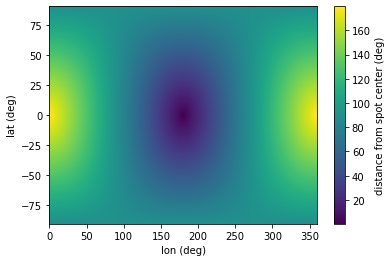

In [13]:
lat,lon = spot.gridmaker.oned()
plt.pcolormesh(lon.value,lat.value,VSPEC.helpers.to_float(spot.r,u.deg).T)
plt.colorbar(label='distance from spot center (deg)')
r_star = 0.14*u.R_sun
rad = spot.angular_radius(r_star)
plt.contour(lon.value,lat.value,spot.r.T < rad)
plt.xlabel('lon (deg)')
plt.ylabel('lat (deg)')